Задание
Построить модель машинного обучения, позволяющую предсказать, является ли цветок цветком класса Ирис-Вирджиния или нет.

План решения:


















Оцените качество модели, обученной с помощью класса MyLogisticRegression, выведя матрицу ошибок для прогнозов обученной моделью на тестовой части данных.

Подберите такие параметры градиентного спуска, чтобы разделение получилось не хуже, чем  у библиотечной модели.

1. Из библиотеки scikit-learn подгрузите данные. Мы уже работали с ними в рамках Темы 1.

In [1]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, ConfusionMatrixDisplay

In [2]:
df = load_iris(as_frame=True).frame

2. Сформируйте новое поле target_virginica, которое будет равно из 0, если цветок не является классом 2, иначе  — 1. Убедитесь, что разметка выполнена корректно, рассчитав количество объектов каждого класса по новой целевой переменной target_virginica.

In [3]:
# Создаем новое поле target_virginica
df['target_virginica'] = (df.target == 2).astype(int)

# Проверим количество объектов каждого класса по новой целевой переменной
print("Количество объектов по классам target_virginica:")
print(df['target_virginica'].value_counts())

Количество объектов по классам target_virginica:
target_virginica
0    100
1     50
Name: count, dtype: int64


In [4]:
df = df.drop(['target'], axis=1)

In [5]:
# Удаление строк с пропущенными данными
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target_virginica   150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


3. Обучите библиотечную модель логистической регрессии на обучающей части данных.

In [7]:
# Разделение данных на обучающий и валидационный наборы
features_train, features_test, target_train, target_test = train_test_split(
    df.drop(['target_virginica'], axis=1), df['target_virginica'], test_size=0.3, random_state=45
)

# Обучение модели
model = LogisticRegression()
model.fit(features_train, target_train)
predictions_val = model.predict(features_test)

def count_errors(true_answers, pred_answers):
    all_answers_together = zip(true_answers, pred_answers)
    errors_list = [1 if v[0] != v[1] else 0 for v in all_answers_together]
    return sum(errors_list)

print("Ошибок:", count_errors(target_test, predictions_val))

Ошибок: 2


In [8]:
target_train.value_counts(normalize=True).sort_index()

target_virginica
0    0.666667
1    0.333333
Name: proportion, dtype: float64

In [9]:
target_test.value_counts(normalize=True).sort_index()

target_virginica
0    0.666667
1    0.333333
Name: proportion, dtype: float64

4. Оцените качество обученной на предыдущем шаге модели, выведя матрицу ошибок для прогнозов обученной моделью на тестовой части данных.

Матрица ошибок:
[[30  0]
 [ 2 13]]
Отчет о качестве классификации:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.97      0.93      0.95        45
weighted avg       0.96      0.96      0.95        45



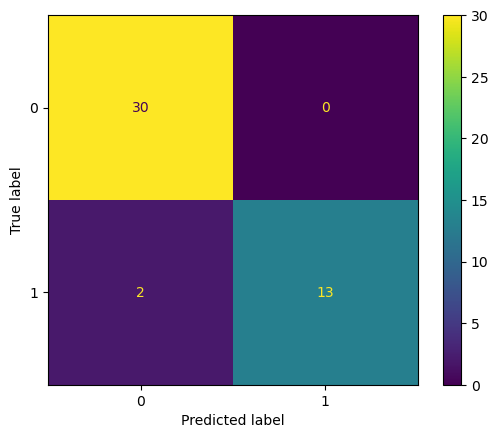

In [10]:
# Рассчитываем матрицу ошибок
cm = confusion_matrix(target_test, predictions_val)
print("Матрица ошибок:")
print(cm)

# Выводим отчет о качестве классификации
print("Отчет о качестве классификации:")
print(classification_report(target_test, predictions_val))

unique_labels = np.unique(np.concatenate([target_test, predictions_val]))
ConfusionMatrixDisplay(confusion_matrix(target_test, predictions_val), display_labels=unique_labels).plot()

5. Сконструируйте свой класс MyLogisticRegression, решающий задачу логистической регрессии методом градиентного спуска.
- Он должен инициализироваться величиной шага градиентного спуска и количеством итераций градиентного спуска.
- Должен содержать метод fit для обучения модели, на вход которой будут подаваться обучающие данные. Чтобы реализовать функцию sigmoid, можно воспользоваться библиотечной функцией np.exp. Для расчета градиента необходимо использовать формулу, приведенную в курсе в блоке «Логистическая регрессия для решения задачи бинарной классификации».
- Должен содержаться метод predict, который будет возвращать лейбл 0/1. Лейбл должен рассчитываться из вероятности принадлежности классу 1. Вероятность должна рассчитываться как сигмоида от результата произведения матрицы фичей X и вектора весов модели w.

In [11]:
class MyLogisticRegression:
    def __init__(self, step_size, iterations):
        self.step_size = step_size
        self.iterations = iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.zeros(X.shape[1])

        for i in range(self.iterations):
            z = X @ w
            h = self.sigmoid(z)
            gradient = X.T @ (h - y) / X.shape[0]
            w -= self.step_size * gradient

        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        z = np.concatenate((np.ones((test_features.shape[0], 1)), test_features), axis=1) @ np.append(self.w0, self.w)
        return (self.sigmoid(z) > 0.5).astype(int)

6. Обучите модель с помощью реализованного класса с произвольными параметрами градиентного спуска.

In [12]:
lr_model = MyLogisticRegression(0.1, 500)
lr_model.fit(features_train, target_train)

7. Оцените качество модели, обученной с помощью класса MyLogisticRegression, выведя матрицу ошибок для прогнозов обученной моделью на тестовой части данных.

Матрица ошибок:
[[30  0]
 [ 0 15]]


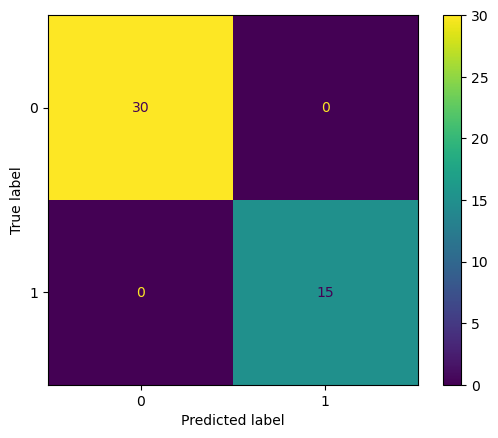

In [13]:
# Предсказание на тестовых данных
y_pred = lr_model.predict(features_test)

# Вычисление матрицы ошибок
confusion_mat = confusion_matrix(target_test, y_pred)
print("Матрица ошибок:")
print(confusion_mat)

unique_labels = np.unique(np.concatenate([target_test, y_pred]))
ConfusionMatrixDisplay(confusion_matrix(target_test, y_pred), display_labels=unique_labels).plot()

8. Подберите такие параметры градиентного спуска, чтобы разделение получилось не хуже, чем  у библиотечной модели.

lr_model = MyLogisticRegression(0.1, 500)

In [14]:
our_lr_mae_train = mean_absolute_error(lr_model.predict(features_train), target_train)
print("MAE нашей модели на обучающем датасете", our_lr_mae_train)
our_lr_mae_val = mean_absolute_error(lr_model.predict(features_test), target_test)
print("MAE нашей модели на валидационном датасете", our_lr_mae_val)

MAE нашей модели на обучающем датасете 0.01904761904761905
MAE нашей модели на валидационном датасете 0.0


Сравним качество с решением прямым методом

In [15]:
X = np.concatenate((np.ones((features_train.shape[0], 1)), features_train), axis=1)        
y = target_train

w = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(y)

straight_mae_train = mean_absolute_error(X @ w, target_train)
print("MAE прямого на решения обучающем датасете", straight_mae_train)

X_test = np.concatenate((np.ones((features_test.shape[0], 1)), features_test), axis=1)
straight_mae_test = mean_absolute_error(X_test @ w, target_test)
print("MAE прямого на решения тестовом датасете", straight_mae_test)

MAE прямого на решения обучающем датасете 0.22913654543298498
MAE прямого на решения тестовом датасете 0.2667978523321445
